## <span style='color:#e91e63'>LAB 13 Horse Heartbeats \(Due Wednesday, December 10, by 11:59pm\). </span>

<span style='color:#e91e63'>For each exercise, answer in the cell below each exercise. Make sure to transfer your answers to Gradescope for your final submission! Please note that some exercises require code while some just require an English answer to a code\-related question. If so, begin the cell with \#.</span>

<span style='color:#e91e63'><u>Submitting:</u></span><span style='color:#e91e63'> You can keep scratch work in this notebook, but you will submit all your final responses on the assignment linked from D2L, which routes you to Gradescope for your submission. </span>

### Learning Goals for Lab 13

By the end of this lab, you will be able to:

- Visualize and interpret vector fields and trajectories of the Van der Pol model.
- Explore how modulation produces heart-rate variability (HRV).
- Analyze real ECG data from Duque at the trot.
- Detect R-peaks and compute RR intervals, SDNN, and RMSSD.
- Compare idealized model output to real biological data.


## <span style='font-family:Arial'><span style='color:#3f51b5'>**Question 0**</span></span>

This lab uses the data collected at the Al Marah Equine Center on November 14, 2025.  You will use actual data tracking the heart beat of the horse, <b>Duque</b>, as he trots.  Huge thanks to Laura Miller for putting this all together and allowing us to work with her horses!

## <span style='font-family:Arial'><span style='color:#3f51b5'>**Questions 1.1-1.5 (Plotting vector fields to view equilibria)**</span></span>

**Van der Pol (VdP) Model (standard form)**
\begin{align*}
\dot X &= Y, \\
\dot Y &= \mu\,(1-X^2)\,Y - X.
\end{align*}

The Van der Pol model was originally proposed to model self-sustaining electrical circuits that oscillate. In biological systems, it is often used as a simplified model of the heartbeat or other rhythmic physiological processes.  

Here, $X(t)$ represents a membrane voltage, and $Y(t)$ is its rate of change. The parameter $\mu>0$ controls the relaxation of the oscillation. For small $\mu$, the oscillations are nearly perfect sine waves; for large $\mu$, they become sharp and spike-like — similar to the rapid depolarization and slow recovery observed in cardiac cycles. Thus, the VdP model captures key qualitative features of a heartbeat: a fast excitation phase followed by a slow recovery, repeating periodically without external forcing.

#### <span style='color:#3f51b5'>Question 1, Part 1 \(Plotting vector fields\)</span>

We will plot the vector field for the VdP model below. Try a few values of $\mu$ (mu). Make the vector field red. Upload a screenshot of the vector field to Gradescope for $\mu=1.5$.


In [0]:
var('X','Y')
mu = ***  # try 0.5, 1, 5
f(X,Y) = Y  # change equation for X' = f(X,Y)
g(X,Y) = mu * (1 - X^2) * Y - X # change equation for Y' = g(X,Y)
vec(X,Y) = [ f(X,Y), g(X,Y)] # defines a vector field for a state point (X,Y) with the change vector in the form [X', Y']
plot_vector_field(vec(X,Y), (X, -3, 3), (Y, -3, 3), color = "dodgerblue", axes_labels = ["X", "Y"]) # uses command plot_vector_field() with an argument that includes the vector field function and bounds on the variables

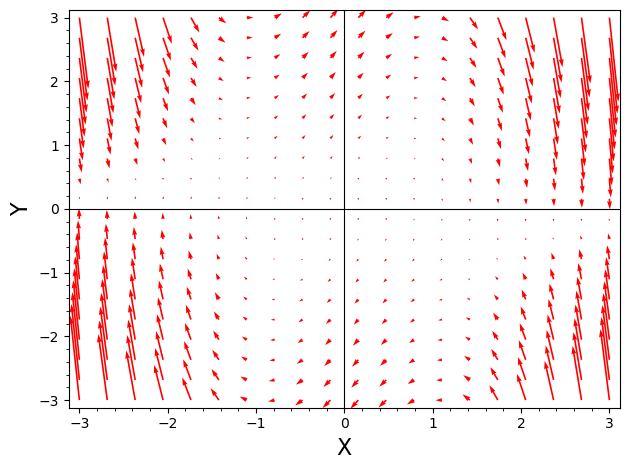

In [1]:
#copy and paste, then modify here
var('X','Y')
mu = 1.5  # try 0.5, 1, 5
f(X,Y) = Y  # change equation for X' = f(X,Y)
g(X,Y) = mu * (1 - X^2) * Y - X # change equation for Y' = g(X,Y)
vec(X,Y) = [ f(X,Y), g(X,Y)] # defines a vector field for a state point (X,Y) with the change vector in the form [X', Y']
plot_vector_field(vec(X,Y), (X, -3, 3), (Y, -3, 3), color = "red", axes_labels = ["X", "Y"]) # uses command plot_vector_field() with an argument that includes the vector field function and bounds on the variables

### <span style='color:#3f51b5'>Question 1, Part 2 \(Interpreting nullclines\)</span>

Run the code below to view a set of nullclines.  The X-nullclines in blue, and the Y-nullclines are in red.  How many equilibrium points would you expect? 


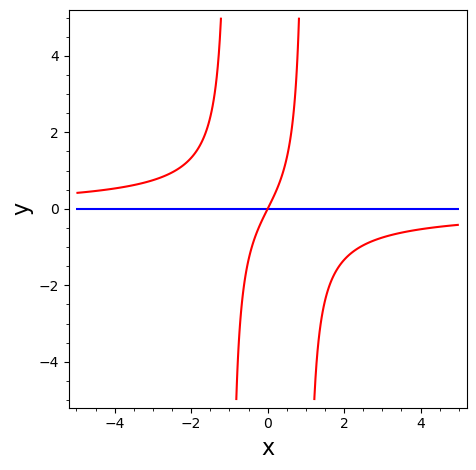

In [2]:
var('y')
mu    = 0.5
xmin = -5
xmax = 5
ymin = -5
ymax = 5

Xnull = implicit_plot(y == 0, (x, xmin, xmax), (y, ymin, ymax), color='blue', axes_labels=["x", "y"])
Ynull1 = implicit_plot(y == x/(mu*(1 - x^2)), (x, xmin, -1.01), (y, ymin, ymax), color='red')
Ynull2 = implicit_plot(y == x/(mu*(1 - x^2)), (x, -0.99, 0.99), (y, ymin, ymax), color='red')
Ynull3 = implicit_plot(y == x/(mu*(1 - x^2)), (x, 1.01, xmax), (y, ymin, ymax), color='red')
show(Xnull + Ynull1+Ynull2+Ynull3)


In [0]:
# there is 1 equilibrium

### <span style='color:#3f51b5'>Question 1, Part 3 \(Time Trajectories\)</span>

The Van der Pol oscillator models self-sustained oscillations such as heartbeat dynamics. Each trajectory $(X(t),Y(t))$ in the phase plane represents how the system evolves from an initial condition $(X_0,Y_0)$.  In the code below, we choose initial conditions that are inside of, outside of, and on a limit cycle. We can see the asymptotic behavior of these three trajectories defining a limit cycle.  The time-series plots of $X(t)$ and $Y(t)$ show us a different perspective of how the voltage and change in voltage vary as the system evolves.  You can change the value of $\mu$ to see how the trajectories and time series change.

Pick one of the values of $\mu$ that are suggested in the comment in the code and upload screenshots of the vector field and time series to Gradescope.


In [6]:
# VdP vector field + trajectories (Sage-only, symbolic RHS)
var('X Y')
mu = 5     # try 0.5, 1, 5

# Vector field
fX = Y
fY = mu*(1 - X^2)*Y - X
VF = plot_vector_field((fX, fY), (X, -3, 3), (Y, -6, 6),
                       color="dodgerblue", axes_labels=["X","Y"])

# Time grid
T = list(srange(0, 30, 0.01))   # numeric list is safest

def traj(x0, y0, thickness=2):
    sol = desolve_odeint([fX, fY], [x0, y0], T, [X, Y])
    pts = [(sol[i][0], sol[i][1]) for i in range(len(T))]
    return list_plot(pts, plotjoined=True, thickness=thickness)

# Choose a few initial conditions. Make sure one is outside the limit cycle and one is outside the limit cycle.
inits = [ (2, 0),   
          (***, ***),   
          (***, ***) ]  
TR = sum([traj(x0, y0) for (x0, y0) in inits])
red_circles = sum([point((x0, y0), size=40, color='red') for (x0, y0) in inits])

show(VF + TR + red_circles + point((0,0), size=40, color='black'),
    figsize=[5,5], aspect_ratio='auto')

# --- Trajectories over time for the same initial conditions ---
T = list(srange(0, 30, 0.01))  # numeric list is safest

def integrate_trajectory(x0, y0):
    sol = desolve_odeint([fX, fY], [x0, y0], T, [X, Y])
    Xs = [sol[i][0] for i in range(len(T))]
    Ys = [sol[i][1] for i in range(len(T))]
    return Xs, Ys

# Define colors and initial conditions
inits = [(2, 0), (0.5, 0.5), (-2, 1)]
colors = ['blue', 'red', 'green']

# Lists for plots
plots_Xt = []
plots_Yt = []

for i, (x0, y0) in enumerate(inits):
    Xs, Ys = integrate_trajectory(x0, y0)
    color = colors[i % len(colors)]

    # wrap zip() in list() here!
    plots_Xt.append(list_plot(list(zip(T, Xs)), plotjoined=True, color=color))
    plots_Yt.append(list_plot(list(zip(T, Ys)), plotjoined=True, color=color))

# Combine and show
show(sum(plots_Xt), axes_labels=['t','X(t)'],figsize=[5,3], aspect_ratio='auto')
show(sum(plots_Yt), axes_labels=['t','Y(t)'],figsize=[5,3], aspect_ratio='auto')

SyntaxError: invalid syntax (1754640313.py, line 21)

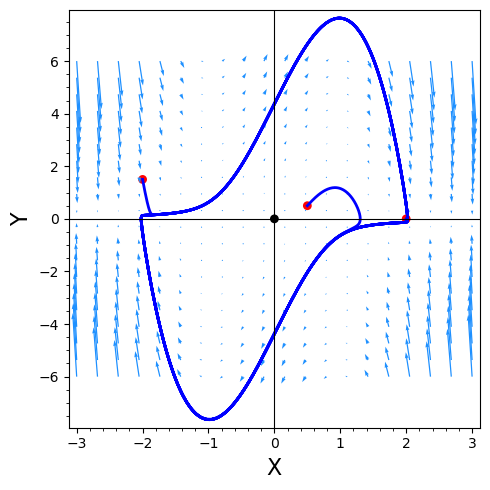

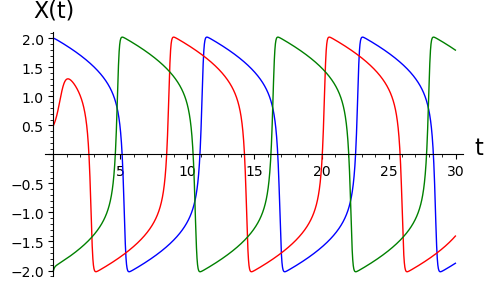

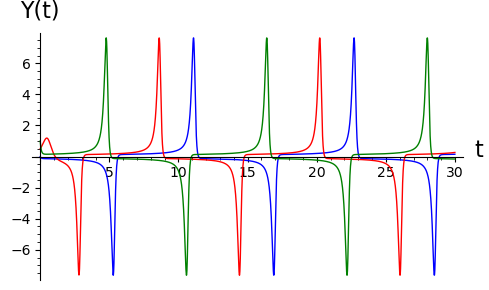

In [4]:
# VdP vector field + trajectories (Sage-only, symbolic RHS)
var('X Y')
mu = 5    # try 0.5, 1, 5

# Vector field
fX = Y
fY = mu*(1 - X^2)*Y - X
VF = plot_vector_field((fX, fY), (X, -3, 3), (Y, -6, 6),
                       color="dodgerblue", axes_labels=["X","Y"])

# Time grid
T = list(srange(0, 30, 0.01))   # numeric list is safest

def traj(x0, y0, thickness=2):
    sol = desolve_odeint([fX, fY], [x0, y0], T, [X, Y])
    pts = [(sol[i][0], sol[i][1]) for i in range(len(T))]
    return list_plot(pts, plotjoined=True, thickness=thickness)

# Choose a few initial conditions. Make sure one is outside the limit cycle and one is outside the limit cycle.
inits = [ (2, 0),   
          (0.5, 0.5),   
          (-2, 1.5) ]  
TR = sum([traj(x0, y0) for (x0, y0) in inits])
red_circles = sum([point((x0, y0), size=40, color='red') for (x0, y0) in inits])

show(VF + TR + red_circles + point((0,0), size=40, color='black'),
    figsize=[5,5], aspect_ratio='auto')

# --- Trajectories over time for the same initial conditions ---
T = list(srange(0, 30, 0.01))  # numeric list is safest

def integrate_trajectory(x0, y0):
    sol = desolve_odeint([fX, fY], [x0, y0], T, [X, Y])
    Xs = [sol[i][0] for i in range(len(T))]
    Ys = [sol[i][1] for i in range(len(T))]
    return Xs, Ys

# Define colors and initial conditions
inits = [(2, 0), (0.5, 0.5), (-2, 1)]
colors = ['blue', 'red', 'green']

# Lists for plots
plots_Xt = []
plots_Yt = []

for i, (x0, y0) in enumerate(inits):
    Xs, Ys = integrate_trajectory(x0, y0)
    color = colors[i % len(colors)]

    # wrap zip() in list() here!
    plots_Xt.append(list_plot(list(zip(T, Xs)), plotjoined=True, color=color))
    plots_Yt.append(list_plot(list(zip(T, Ys)), plotjoined=True, color=color))

# Combine and show
show(sum(plots_Xt), axes_labels=['t','X(t)'],figsize=[5,3], aspect_ratio='auto')
show(sum(plots_Yt), axes_labels=['t','Y(t)'],figsize=[5,3], aspect_ratio='auto')





### <span style='color:#3f51b5'>Question 1, Part 4 \(Time Trajectories\)</span>

Describe what happens to each trajectory over time. Do all initial conditions eventually approach the same periodic orbit?  (See Gradescope for options)


In [0]:
# This inner and outer trajectories spiral toward the limit cycle, and the one that starts on it stays on it.

### <span style='color:#3f51b5'>Question 1, Part 5 \(Varying mu\)</span>

Use the interactive plot of the time series for $X(t)$ to explore how changing $\mu$ changes the waveform. Move the slider for $\mu$ from 0.1 to 8.0. Observe how the shape and frequency of $X(t)$ changes as $\mu$ increases. Select the answers that apply on Gradescope.


In [5]:
# Interactive Van der Pol oscillator: vary μ, show X(t)
var('X Y')

@interact
def vdp_single_mu(mu = slider(0.1, 8, 0.1, default=1.0, label='μ (nonlinearity)')):
    # System definition
    fX = Y
    fY = mu*(1 - X^2)*Y - X

    # Fixed initial condition and time grid
    x0, y0 = 2.0, 0.0
    T = list(srange(0, 30, 0.01))

    # Integrate ODE
    sol = desolve_odeint([fX, fY], [x0, y0], T, [X, Y])
    Xs = [sol[i][0] for i in range(len(T))]
    Ys = [sol[i][1] for i in range(len(T))]

    # Time-series plot of X(t)
    p = list_plot(list(zip(T, Xs)), plotjoined=True, color='blue',
                  thickness=2, axes_labels=['t','X(t)'])
    
    show(p, figsize=[6,3])


Interactive function <function vdp_single_mu at 0x7fd1804b44a0> with 1 widget
  mu: TransformFloatSlider(value=1.0, description='μ (nonlinearity)', max=8.0, min=0.1)

In [0]:
#As mu increases, the oscillation changes from smooth and sinusoidal to a waveform with intervals of slow increase/decrease followed by a rapid increase/decrease.
#The frequency of oscillation decreases as mu increases.

## <span style='font-family:Arial'><span style='color:#3f51b5'>**Questions 2.1-2.2 (VdP with simple HRV-like modulation)**</span></span>

In real biological systems, the heartbeat is not perfectly periodic — each beat varies slightly in duration. This heart rate variability (HRV) reflects physiological modulation by the autonomic nervous system. We can simulate HRV-like behavior by letting the intrinsic frequency or the forcing term in a mathematical oscillator vary slowly with time.

We modify the second equation by adding a time-dependent modulation term:

$Y' = \mu(1-X^2)Y-\omega(t)X$

where

$\omega(t) = \omega_0 + a \sin(2\pi f_m t)$.

Here, $\omega_0$ controls the mean heart rate, $a$ is the amplitude of frequency modulation (which controls HRV strength), and $f_m$ is the modulation frequency. When $a=0$, the oscillator beats at a steady rate (no HRV). When $a>0$, the instantaneous frequency oscillates slowly — just as a real horse’s or human’s heart rate fluctuates with breathing or stress.


### <span style='color:#3f51b5'>Question 2, Part 1 \(Varying amplitude of modulation\)</span>

Use the slider to vary the modulation amplitude, $a$, between 0 and 1. Observe the waveform $X(t)$ as $a$ changes. Describe how the spacing between peaks changes as you increase $a$.


In [6]:
# Interactive Van der Pol with HRV-like μ(t): vary a, show X(t)
var('X Y t')
from math import sin  # numeric sine

@interact
def vdp_mod_single_a(a = slider(0.0, 0.6, 0.05, default=0.30, label='a (modulation amplitude)')):
    mu   = 2.0
    omega = 1.0
    f_m = 0.20
    x0, y0 = 2.0, 0.0
    T = [float(u) for u in srange(0, 80, 0.01)]  # numeric time grid

    # Component RHS functions: f1 = X', f2 = Y'
    def f1(x, y, tt):
        return y

    def f2(x, y, tt):
        omega_t = omega + a*sin(2*pi*f_m*tt)
        return mu*(1.0 - x**2)*y - omega_t*x

    # Integrate (note: a list of component callables, and ivar=t)
    sol = desolve_odeint([f1, f2], [x0, y0], T, [X, Y], ivar=t)
    Xs  = [sol[i][0] for i in range(len(T))]

    # Plot X(t)
    p = list_plot(list(zip(T, Xs)), plotjoined=True, color='blue',
                  thickness=2, axes_labels=['t','X(t)'])
    show(p, figsize=[10,3])


Interactive function <function vdp_mod_single_a at 0x7fd1736b74c0> with 1 widget
  a: TransformFloatSlider(value=0.3, description='a (modulation amplitude)', max=0.6, step=0.05)

In [0]:
# When a increases, the peaks occur at uneven intervals — some cycles get shorter, others longer — showing heart-rate-like variability.

### <span style='color:#3f51b5'>Question 2, Part 2 \(Varying amplitude of modulation\)</span>

<p>
In this question, you will explore how changing the modulation amplitude $a$
affects the regularity of the heartbeat signal $X(t)$ in the Van der Pol model.
</p>

<h3>HRV metrics we’ll use to measure irregularity:</h3>

<p><b>mean RR</b>: This is the <i>average</i> time between beats.</p>
<ul>
  <li>How to think about it: find each gap between one beat and the next, add up all the gaps, then divide by how many gaps you had.</li>
  <li><b>Bigger mean RR</b> = longer time between beats.</li>
</ul>

<p><b>SDNN</b>: This measures how <i>spread out</i> the RR times are.</p>
<ul>
  <li>First find the average RR (mean RR).</li>
  <li>For each RR, see how far it is from the average.</li>
  <li>Square those differences (to keep them positive), average the squares, then take a square root.</li>
  <li><b>Bigger SDNN</b> = more overall variability.</li>
</ul>

<p><b>RMSSD</b>: This measures how much RR changes <i>from one beat to the next</i>.</p>
<ul>
  <li>Look at neighboring RR values (RR<sub>1</sub> to RR<sub>2</sub>, RR<sub>2</sub> to RR<sub>3</sub>, …).</li>
  <li>For each neighboring pair, find the difference, square it.</li>
  <li>Average those squares, then take a square root.</li>
  <li><b>Bigger RMSSD</b> = more short-term (beat-to-beat) variability.</li>
</ul>

<h3> What to do for Gradescope:</h3>
<ol>
  <li>Run the simulation for two different values of <b>a</b>: once with $a= 0.1$, then again with $a= 0.6$.</li>
  <li>For each value of <b>a</b>, use the code below to calculate the following heart-rate-variability
      metrics:</li>
      <ul>
        <li><b>mean RR</b> – the average time between beats,</li>
        <li><b>SDNN</b> – how much the beat-to-beat intervals vary overall, and</li>
        <li><b>RMSSD</b> – how much one beat interval changes compared with the next.</li>
        <li><b>mean BPM</b> – the average beats per minute</li>
      </ul>
  <li>Record the four metrics (<b>mean RR</b>, <b>SDNN</b>, <b>RMSSD</b>,<b>mean BPM</b>) for each choice of <b>a</b>.</li>
  <li><b>Choose the values on Gradescope that match the ones you calculated.</b> You should have two sets of values, one for each modulation amplitude you tested.</li>
</ol>

In [0]:
# One-run HRV-like Van der Pol simulation and HRV metrics

var('X Y t')
from math import sin, pi

# --- Parameters  ---
A       = ***      # modulation amplitude
mu      = 2.0
x0, y0  = 2.0, 0.0
t_max   = 800
dt      = 0.01
thresh  = 0.5
ref_s   = 0.30
omega0  = 1.0      # base frequency
f_m     = 0.2      # modulation frequency

# --- Model equations ---
def f1(x, y, tt):
    return y
def f2(x, y, tt):
    omega_t = omega0 + A*sin(2*pi*f_m*tt)
    return mu*(1.0 - x**2)*y - omega_t*x

# --- Integrate ---
T = [float(u) for u in srange(0, t_max, dt)]
sol = desolve_odeint([f1, f2], [x0, y0], T, [X, Y], ivar=t)
Xs = [sol[i][0] for i in range(len(T))]

# --- Beat detection ---
beats = []
last_t = -1e9
prev = Xs[0]
for k in range(1, len(T)):
    if prev < thresh and Xs[k] >= thresh:
        tk = T[k]
        if tk - last_t >= ref_s:
            beats.append(tk)
            last_t = tk
    prev = Xs[k]

# --- RR intervals and HRV metrics ---
if len(beats) < 3:
    print("Not enough beats detected. Adjust threshold or parameters.")
else:
    rr = [beats[i+1] - beats[i] for i in range(len(beats)-1)]
    mean_rr = sum(rr)/len(rr)
    sdnn = sqrt(sum([(r - mean_rr)^2 for r in rr]) / len(rr))
    rmssd = sqrt(sum([(rr[i+1]-rr[i])^2 for i in range(len(rr)-1)]) / (len(rr)-1))
    bpm = [60/r for r in rr]
    mean_bpm = sum(bpm)/len(bpm)

    print(f"Beats detected: {len(beats)}")
    print(f"Mean RR:   {mean_rr:.3f} s")
    print(f"SDNN:      {sdnn:.3f} s")
    print(f"RMSSD:     {rmssd:.3f} s")
    print(f"Mean BPM:  {mean_bpm:.1f}")

# optional: plot last 20 seconds of X(t) for context
p = list_plot(list(zip(T[-6000:], Xs[-6000:])), plotjoined=True, color='blue',
              axes_labels=['t','X(t)'])
p.show(figsize=[6,3])

Beats detected: 97
Mean RR:   8.235 s
SDNN:      1.022 s
RMSSD:     1.809 s
Mean BPM:  7.4


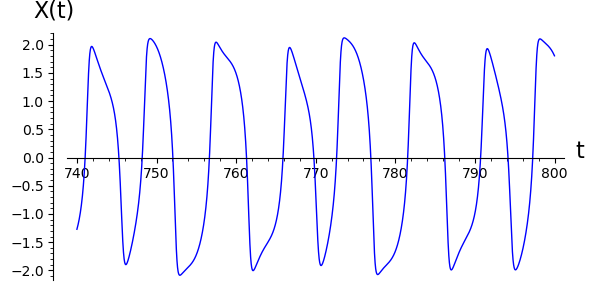

In [7]:
# One-run HRV-like Van der Pol simulation and HRV metrics

var('X Y t')
from math import sin, pi

# --- Parameters  ---
a       = 0.6      # modulation amplitude.  Run this once with a= 0.1, then again with a=0.6
mu      = 2.0
x0, y0  = 2.0, 0.0
t_max   = 800
dt      = 0.01
thresh  = 0.5
ref_s   = 0.30
omega0  = 1.0      # base frequency
f_m     = 0.2      # modulation frequency

# --- Model equations ---
def f1(x, y, tt):
    return y
def f2(x, y, tt):
    omega_t = omega0 + a*sin(2*pi*f_m*tt)
    return mu*(1.0 - x**2)*y - omega_t*x

# --- Integrate ---
T = [float(u) for u in srange(0, t_max, dt)]
sol = desolve_odeint([f1, f2], [x0, y0], T, [X, Y], ivar=t)
Xs = [sol[i][0] for i in range(len(T))]

# --- Beat detection ---
beats = []
last_t = -1e9
prev = Xs[0]
for k in range(1, len(T)):
    if prev < thresh and Xs[k] >= thresh:
        tk = T[k]
        if tk - last_t >= ref_s:
            beats.append(tk)
            last_t = tk
    prev = Xs[k]

# --- RR intervals and HRV metrics ---
if len(beats) < 3:
    print("Not enough beats detected. Adjust threshold or parameters.")
else:
    rr = [beats[i+1] - beats[i] for i in range(len(beats)-1)]
    mean_rr = sum(rr)/len(rr)
    sdnn = sqrt(sum([(r - mean_rr)^2 for r in rr]) / len(rr))
    rmssd = sqrt(sum([(rr[i+1]-rr[i])^2 for i in range(len(rr)-1)]) / (len(rr)-1))
    bpm = [60/r for r in rr]
    mean_bpm = sum(bpm)/len(bpm)

    print(f"Beats detected: {len(beats)}")
    print(f"Mean RR:   {mean_rr:.3f} s")
    print(f"SDNN:      {sdnn:.3f} s")
    print(f"RMSSD:     {rmssd:.3f} s")
    print(f"Mean BPM:  {mean_bpm:.1f}")

# optional: plot last 20 seconds of X(t) for context
p = list_plot(list(zip(T[-6000:], Xs[-6000:])), plotjoined=True, color='blue',
              axes_labels=['t','X(t)'])
p.show(figsize=[6,3])


## <span style='font-family:Arial'><span style='color:#3f51b5'>**Questions 3.1-3.2 (Analyzing ECG Data)**</span></span>

<p>
Earlier in this lab you worked with the <b>Van der Pol model</b>, a mathematical model that
produces smooth, repeating oscillations. This model is useful for understanding
<b>rhythmic timing</b> and <b>limit cycles</b> – ideas that help explain how systems can beat or
oscillate on their own, similar to the way the heart maintains its rhythm.
</p>

<p>
However, the Van der Pol signal <i>does not look like</i> a real ECG waveform. When we look at the 
ECG collected from <b>Duque</b>, we see sharp upward spikes (the R-peaks), small bumps before and 
after each spike (the P and T waves), and sometimes noise from movement or the saddle pads.
</p>

<p>
These differences happen because the two systems describe <b>different things</b>:
</p>

<ul>
  <li><b>The Van der Pol model</b> represents a <i>simple self-sustained oscillator</i>.
      It captures the <b>timing</b> of a beat, but not the electrical <b>shape</b> of one.</li>

  <li><b>A real ECG</b> measures the heart’s <i>electrical activity</i>. Each heartbeat has several
      components (P wave, QRS complex, T wave), and the R-peak rises and falls very quickly.
      This produces the tall, sharp spikes you see in real ECG data.</li>

  <li>The ECG also includes <b>noise</b> from movement, breathing, muscle activity, and contact
      with the sensors, which makes the signal more irregular than the smooth Van der Pol
      oscillator.</li>
</ul>

<p>
Because of these differences, a model like Van der Pol is helpful for studying <b>how often</b>
beats occur and how they can vary over time, but not for reproducing the <b>exact shape</b> of
a biological ECG.
</p>

<p>
In the next part of the lab you will use real ECG data from Duque and compare different
windows of the signal using an interactive plot. This will help you see how beat detection
works on a real biological waveform, and how it can be more challenging than in an idealized
mathematical model (like the Van der Pol model).
</p>




### <span style='color:#3f51b5'>Question 3, Part 1 \(Plotting the ECG\)</span>

In this part of the question we will look at his ECG signal between 
<b>122630 ms</b> and <b>229412 ms</b>. This is a long interval, so we will zoom in on
a smaller window inside this time range.


<ol>
  <li>Use the code below to load the ECG data from Duque.</li>
  <li>Choose a window inside 122630-229412 ms by changing 
      <code>t_plot_start</code> and <code>t_plot_end</code> (in milliseconds).</li>
  <li> Run the code to plot the ECG signal in your chosen window and look at the heartbeat pattern.</li>
  <li><b>Upload your ECG plot for your chosen window to Gradescope.</b></li>
  <li><b>Describe what you see in your ECG plot (number of beats, regularity of spacing, any noise).</b></li>
</ol>

<p>
Make sure your window shows several clear beats (for example, a few seconds of data).
</p>



In [8]:
# Load Duque's ECG data and plot a chosen window in the trot interval

import csv

filename = 'ECG_11.14.25_2.40.36_PM.txt'   # ECG file from Duque

# Full trot interval in milliseconds
t_min_trot = 122630
t_max_trot = 229412

ecg_all = []
t_all   = []

# Read the CSV file
with open(filename, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        # Skip comments and header lines
        if len(row) != 2:
            continue
        if row[0].startswith('#') or row[0] == 'ECG':
            continue
        # Convert to numbers
        v  = float(row[0])   # ECG in mV
        ms = int(row[1])     # time in ms
        # Keep only the trot interval
        if t_min_trot <= ms <= t_max_trot:
            ecg_all.append(v)
            t_all.append(ms)

print("Total samples in trot interval:", len(t_all))

# ------------------ STUDENT INPUT HERE ------------------
# Choose a window INSIDE [122630, 229412] ms
t_plot_start = ***   # e.g., 125000
t_plot_end   = ***   # e.g., 130000
# --------------------------------------------------------

# Extract samples in the chosen window
ecg_win = []
t_win   = []
for v, ms in zip(ecg_all, t_all):
    if t_plot_start <= ms <= t_plot_end:
        ecg_win.append(v)
        t_win.append(ms)

print("Samples in chosen window:", len(t_win))

if len(t_win) == 0:
    print("No data in this window. Check that t_plot_start and t_plot_end are inside the trot interval.")
else:
    # Convert ms to seconds relative to the start of the window
    t_sec = [(ms - t_plot_start)/1000.0 for ms in t_win]

    p = list_plot(list(zip(t_sec, ecg_win)), plotjoined=True,
                  axes_labels=['time (s since window start)', 'ECG (mV)'],
                  thickness=1)
    show(p, figsize=[10,3])


SyntaxError: invalid syntax (2239259098.py, line 35)

Total samples in trot interval: 13887
Samples in chosen window: 650


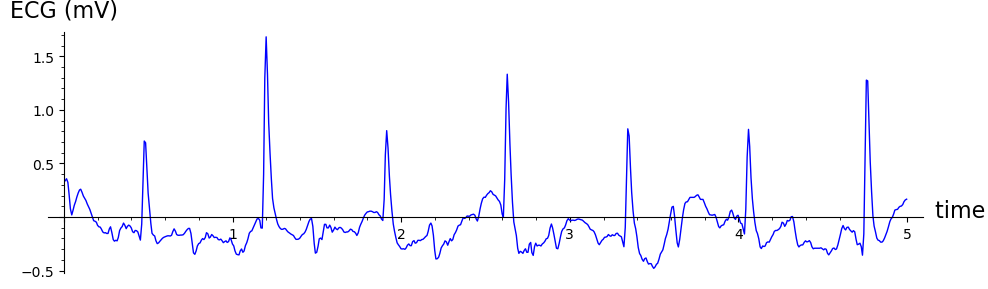

In [9]:
# Load Duque's ECG data and plot a chosen window in the trot interval

import csv

filename = 'ECG_11.14.25_2.40.36_PM.txt'   # ECG file from Duque

# Full trot interval in milliseconds
t_min_trot = 122630
t_max_trot = 229412

ecg_all = []
t_all   = []

# Read the CSV file
with open(filename, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        # Skip comments and header lines
        if len(row) != 2:
            continue
        if row[0].startswith('#') or row[0] == 'ECG':
            continue
        # Convert to numbers
        v  = float(row[0])   # ECG in mV
        ms = int(row[1])     # time in ms
        # Keep only the trot interval
        if t_min_trot <= ms <= t_max_trot:
            ecg_all.append(v)
            t_all.append(ms)

print("Total samples in trot interval:", len(t_all))

# ------------------ STUDENT INPUT HERE ------------------
# Choose a window INSIDE [122630, 229412] ms
t_plot_start = 125000   # e.g., 125000
t_plot_end   = 130000   # e.g., 130000
# --------------------------------------------------------

# Extract samples in the chosen window
ecg_win = []
t_win   = []
for v, ms in zip(ecg_all, t_all):
    if t_plot_start <= ms <= t_plot_end:
        ecg_win.append(v)
        t_win.append(ms)

print("Samples in chosen window:", len(t_win))

if len(t_win) == 0:
    print("No data in this window. Check that t_plot_start and t_plot_end are inside the trot interval.")
else:
    # Convert ms to seconds relative to the start of the window
    t_sec = [(ms - t_plot_start)/1000.0 for ms in t_win]

    p = list_plot(list(zip(t_sec, ecg_win)), plotjoined=True,
                  axes_labels=['time (s)', 'ECG (mV)'],
                  thickness=1)
    show(p, figsize=[10,3])


In [0]:
#Answers will vary depending on the window chosen. Sample response: The signal shows a series of sharp R-peaks on top of a noisy baseline. 
#The amplitude ranges roughly from about −0.5 mV to 1.7 mV, with the R-peaks clearly standing out from the background noise. 
#I can see several consecutive beats (about one every ~0.6–0.7 s). The baseline wanders slightly below zero between beats, but the main beat pattern is easy to identify. 

### <span style='color:#3f51b5'>Question 3, Part 2 \(Finding the Peaks and Calculation Variability\)</span>

<p>
When we look at a small window of the ECG, we want to be able to recognize the locations
of the <b>R-peaks</b> (the sharp upward spikes). Detecting these peaks lets us compute the
time between beats (the <b>RR intervals</b>), which is the foundation of heart-rate variability 
(HRV) analysis.
</p>

<p>
However, the ECG waveform can look different depending on which moment we examine. Some
sections show clean beats with very clear R-peaks, while others may include motion artifacts,
baseline drift, or noise from the saddle pads and movement of the horse. To explore these 
differences, we will use an <b>interactive plot</b> with sliders that let you choose:
</p>

<ul>
  <li>a <b>start time</b> inside the trot interval, and</li>
  <li>a <b>window length</b> (2–40 seconds).</li>
</ul>

<p>
This lets you scan through the entire trot sequence and visually evaluate how easy (or 
difficult) it is for the computer to find the heartbeat peaks.
</p>

<p style="color:#d32f2f"><b>
Before using the sliders, please run the first code cell below. It loads the ECG data,
extracts the trot interval, and automatically detects the R-peaks for the whole sequence.
</b></p>

<p>
Once you run the first cell, move on to the interactive viewer. Use the sliders to scan through the trot. Try to find:

- a window with very clear peaks
- a window with noisy or distorted peaks

This will help you understand when automated peak detection works well and when it struggles.
Pick one of the two windows and upload a screenshot of this window to Gradescope and describe what you see.
</p>



In [10]:
############################################################
# Cell 1: Load Duque's ECG, keep trot interval, detect peaks,
#         and compute HRV metrics on the full trot.
############################################################

import csv

filename = "ECG_11.14.25_2.40.36_PM.txt"   # make sure this file is present

# Trot interval in milliseconds
t_min_ms = 122630
t_max_ms = 229412

t_ms_all = []
ecg_all  = []

with open(filename, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) != 2:
            continue
        if row[0].startswith("#") or row[0] == "ECG":
            continue
        v  = float(row[0])
        ms = int(row[1])
        if t_min_ms <= ms <= t_max_ms:
            ecg_all.append(v)
            t_ms_all.append(ms)

print("Samples in trot interval:", len(t_ms_all))

# Time in seconds since trot start
t_sec_all = [(ms - t_min_ms)/1000.0 for ms in t_ms_all]
T_MAX = t_sec_all[-1]
print("Trot duration (s):", T_MAX)

# --- Simple peak detection on FULL trot ---

min_height = 0.5   # mV threshold for a true R-peak
min_sep    = 0.40  # minimum time between peaks (sec)

peak_times  = []
peak_values = []
last_t = -1e9

for i in range(1, len(ecg_all)-1):
    # local max in raw ECG
    if ecg_all[i] > ecg_all[i-1] and ecg_all[i] >= ecg_all[i+1]:
        if ecg_all[i] >= min_height:
            t_i = t_sec_all[i]
            if t_i - last_t >= min_sep:
                peak_times.append(t_i)
                peak_values.append(ecg_all[i])
                last_t = t_i

print("Number of peaks detected:", len(peak_times))

# --- HRV metrics on full trot ---

if len(peak_times) < 3:
    print("Not enough peaks detected; adjust min_height or min_sep.")
else:
    rr = [peak_times[i+1] - peak_times[i] for i in range(len(peak_times)-1)]
    mean_rr = sum(rr)/len(rr)
    diffs_from_mean = [r - mean_rr for r in rr]
    sdnn = sqrt(sum(d^2 for d in diffs_from_mean)/len(diffs_from_mean))
    if len(rr) > 1:
        succ_diffs = [rr[i+1] - rr[i] for i in range(len(rr)-1)]
        rmssd = sqrt(sum(d^2 for d in succ_diffs)/len(succ_diffs))
    else:
        rmssd = NaN
    bpm_list = [60.0/r for r in rr]
    mean_bpm = sum(bpm_list)/len(bpm_list)

    print("mean RR  = %.3f s" % mean_rr)
    print("SDNN     = %.3f s" % sdnn)
    print("RMSSD    = %.3f s" % rmssd)
    print("mean BPM = %.1f"  % mean_bpm)



Samples in trot interval: 13887
Trot duration (s): 106.779000000000
Number of peaks detected: 151
mean RR  = 0.705 s
SDNN     = 0.093 s
RMSSD    = 0.088 s
mean BPM = 86.8


In [11]:
############################################################
# Cell 2: Interactive ECG window viewer with TWO sliders:
#    - Window start time
#    - Window length
############################################################

@interact
def view_ecg_window(
    t_start = slider(0.0, T_MAX, 0.5, default=10.0,
                     label="Window start time (s since trot start)"),
    window_len = slider(2.0, 40.0, 1.0, default=5.0,
                        label="Window length (s)")
):
    # keep window within the trot interval
    t_end = min(t_start + window_len, T_MAX)

    # extract ECG segment for plotting
    ecg_win = []
    t_win   = []
    for t, v in zip(t_sec_all, ecg_all):
        if t_start <= t <= t_end:
            ecg_win.append(v)
            t_win.append(t - t_start)   # shift so the plot starts at t=0

    # extract peaks in this window
    peak_times_win  = []
    peak_values_win = []
    for t, v in zip(peak_times, peak_values):
        if t_start <= t <= t_end:
            peak_times_win.append(t - t_start)
            peak_values_win.append(v)

    print("Window: [%.2f, %.2f] s (length = %.2f s)" 
          % (t_start, t_end, t_end - t_start))
    print("Samples:", len(t_win), "   Peaks:", len(peak_times_win))

    if len(t_win) == 0:
        print("No data in this window — move the sliders.")
        return

    # Plot ECG
    p_sig = list_plot(list(zip(t_win, ecg_win)), plotjoined=True,
                      color="blue", thickness=1,
                      axes_labels=["time (since window start)", "ECG (mV)"])

    # Overlay peaks in red
    p_peaks = sum(point((peak_times_win[i], peak_values_win[i]),
                        color="red", size=25)
                  for i in range(len(peak_times_win)))

    G = p_sig + p_peaks
    G.show(figsize=[12,4], frame=True, axes=True)


Interactive function <function view_ecg_window at 0x7fd178340b80> with 2 widgets
  t_start: TransformFloatSlider(value=10.0, description='Window start time (s since trot start)', max=106.779, step=0.5)
  window_len: TransformFloatSlider(value=5.0, description='Window length (s)', max=40.0, min=2.0, step=1.0)

In [49]:
#Sample Answer: In the window I selected, the ECG shows several clear heartbeats from Duque during the trot. 
#Each beat has a tall, sharp R-peak that stands out clearly from the baseline, and the spacing between peaks looks fairly regular, suggesting a steady heart rate in this segment. 
#There is a small amount of noise and some minor baseline drift, but it doesn’t interfere much with identifying the R-peaks. 

### <span style='color:#3f51b5'>Question 3, Part 3 \(Reflection Question\)</span>

Compare the Van der Pol oscillator to Duque’s real ECG:

- In what ways is the VdP model similar to a real heartbeat?
- In what ways does it fail to capture the biological waveform?
- Why is VdP still useful, despite being unrealistic as an ECG?


In [0]:
#Similarities:
#The Van der Pol oscillator and the real ECG both show repeating cycles that represent heartbeat rhythm. 
#In both cases, there is a regular pattern where the system rises and falls once every beat, and the time between beats can change over time.

#Differences:
#The Van der Pol waveform is smooth and rounded, while the real ECG has sharp spikes (R-peaks) and smaller waves before and after each spike. 
#The ECG also includes noise and baseline drift that the VdP model does not show.

#Why VdP is still useful:
#Even though the VdP model does not reproduce the real ECG shape, it does model the timing of beats and how that timing can change. 
#That makes it useful for studying heart-rate variability without needing the full biology of the heart.